<a href="https://colab.research.google.com/github/YuxuanHuang455/PS1-Microexpression/blob/main/Test_LBP%2BCNN%2BSVM_Classification_copy_of_%E2%80%9CMicroexpression_basic_EDA_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Microexpression-PS1-test code for charactor



Step1: prepare data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
gdrive_path = "/content/drive/MyDrive"
dataset_path = os.path.join(gdrive_path, "data")
print("data:", dataset_path)
print("folder:", os.listdir(dataset_path))


data: /content/drive/MyDrive/data
folder: ['.DS_Store', 'test', 'train']


summaries, visualizations, missing data check

=== Training splits (per label) ===


,train1,train2,train3,total
happy,7215,1950,1500,10665
sad,4830,1383,1500,7713
anger,3995,1411,1522,6928
fear,4097,479,1500,6076
surprise,3171,1114,1505,5790
neutral,4965,644,0,5609
disgust,436,662,1500,2598


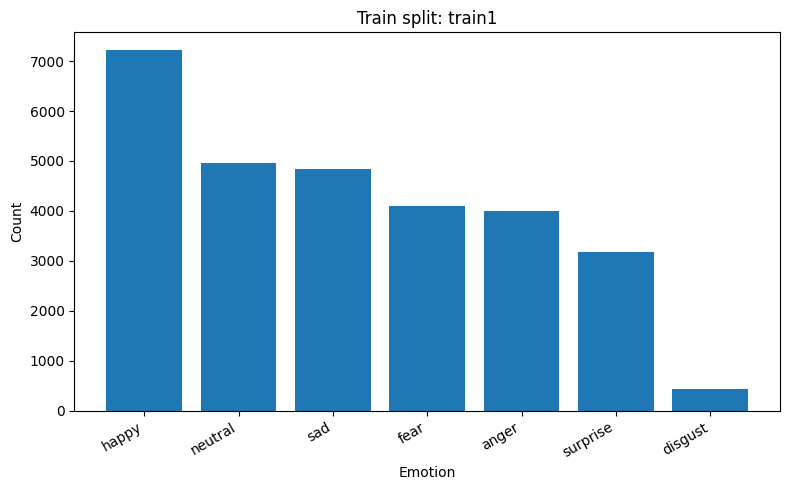

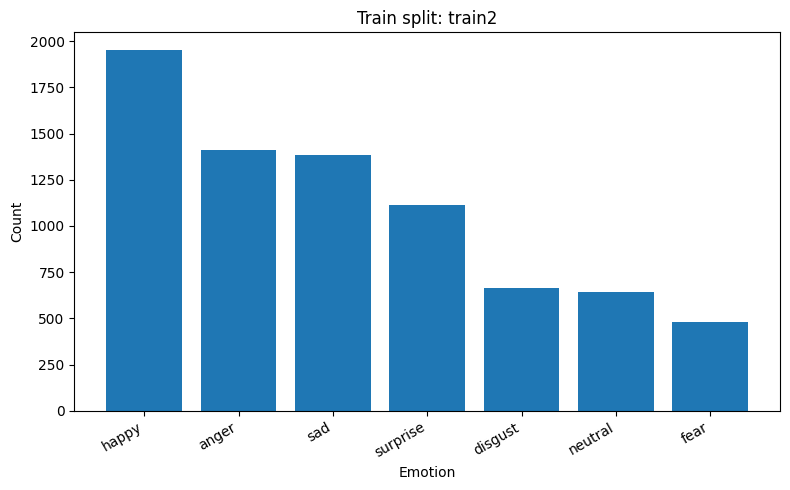

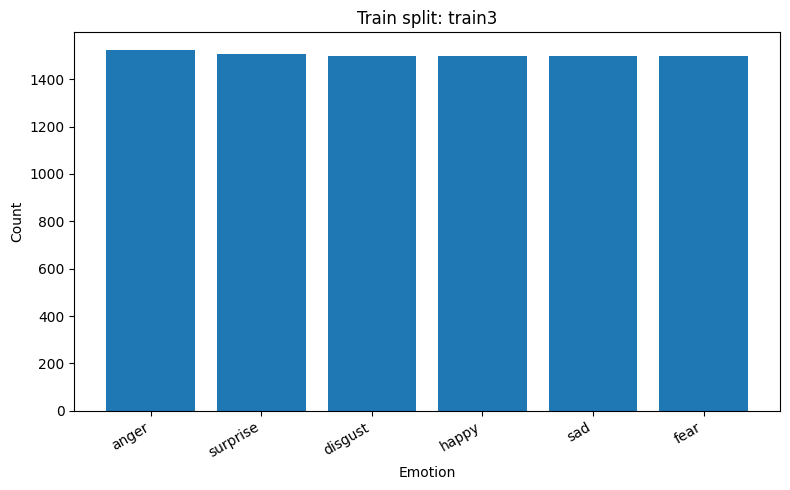

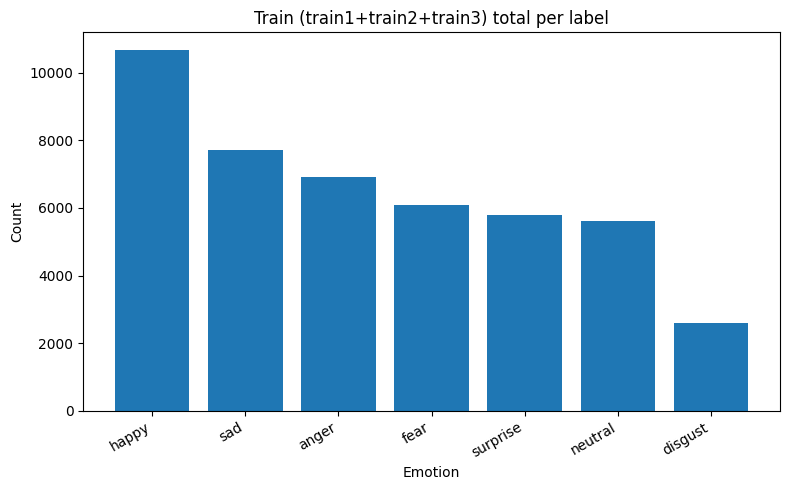

In [4]:
import os
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

DATA_ROOT = "/content/drive/MyDrive/data"
TRAIN_ROOT = os.path.join(DATA_ROOT, "train")
TEST_ROOT  = os.path.join(DATA_ROOT, "test")
IMG_EXTS = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}

def is_image_file(fname: str) -> bool:
    return os.path.splitext(fname)[1].lower() in IMG_EXTS
CANONICAL_MAP = {
    "happiness": "happy",
    "angry": "anger",
    "disgusted": "disgust",
    "surprised": "surprise",
    "sadness": "sad",
}

def canonicalize(label: str) -> str:
    lab = label.strip().lower()
    return CANONICAL_MAP.get(lab, lab)

def count_split(root_dir: str, split_name: str) -> dict:

    counts = defaultdict(int)
    if not os.path.isdir(root_dir):
        print(f"[WARN] {split_name} 路径不存在：{root_dir}")
        return {}

    for entry in os.listdir(root_dir):
        if entry.startswith("."):
            continue
        class_dir = os.path.join(root_dir, entry)
        if not os.path.isdir(class_dir):
            continue
        label = canonicalize(entry)
        for r, _, files in os.walk(class_dir):
            for f in files:
                if is_image_file(f):
                    counts[label] += 1
    return dict(counts)

def counts_to_dataframe(split_counts: dict, split_order: list) -> pd.DataFrame:

    all_labels = set()
    for c in split_counts.values():
        all_labels.update(c.keys())
    all_labels = sorted(all_labels)
    df = pd.DataFrame(index=all_labels, columns=split_order, data=0)
    for split, cdict in split_counts.items():
        for lab, n in cdict.items():
            df.loc[lab, split] = n
    df["total"] = df[split_order].sum(axis=1)
    df = df.sort_values("total", ascending=False)
    return df

def barplot_counts(df: pd.DataFrame, title: str):
    plt.figure(figsize=(8,5))
    plt.bar(df.index, df["total"])
    plt.title(title)
    plt.xlabel("Emotion")
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

#Stats train1 / train2 / train3
train_splits = ["train1", "train2", "train3"]
train_counts = {}
for s in train_splits:
    split_dir = os.path.join(TRAIN_ROOT, s)
    train_counts[s] = count_split(split_dir, s)

df_train = counts_to_dataframe(train_counts, train_splits)
print("=== Training splits (per label) ===")
display(df_train)

for s in train_splits:
    df_s = pd.DataFrame(train_counts[s], index=[0]).T
    df_s.columns = ["count"]
    df_s = df_s.sort_values("count", ascending=False)
    barplot_counts(df_s.assign(total=df_s["count"]), f"Train split: {s}")

# train1+2+3
barplot_counts(df_train, "Train (train1+train2+train3) total per label")

=== Test splits (per label) ===


,test1,test2,total
happy,207,480,687
surprise,249,260,509
anger,135,350,485
sad,84,330,414
disgust,177,160,337
fear,75,120,195
neutral,0,160,160
contempt,54,0,54


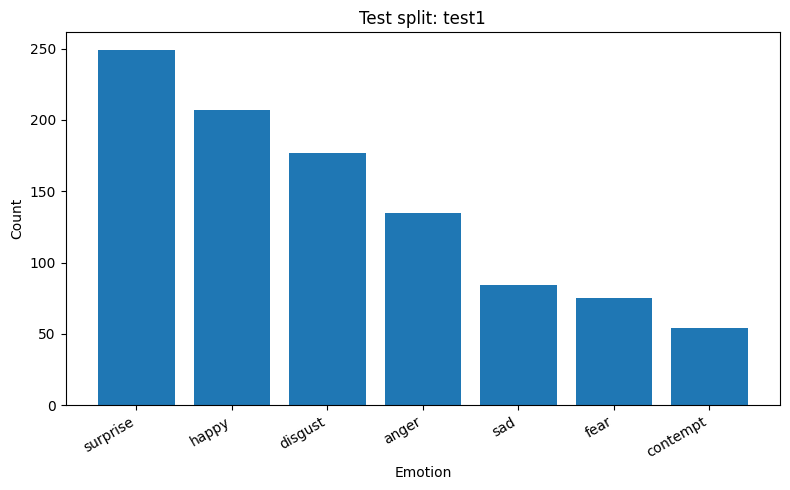

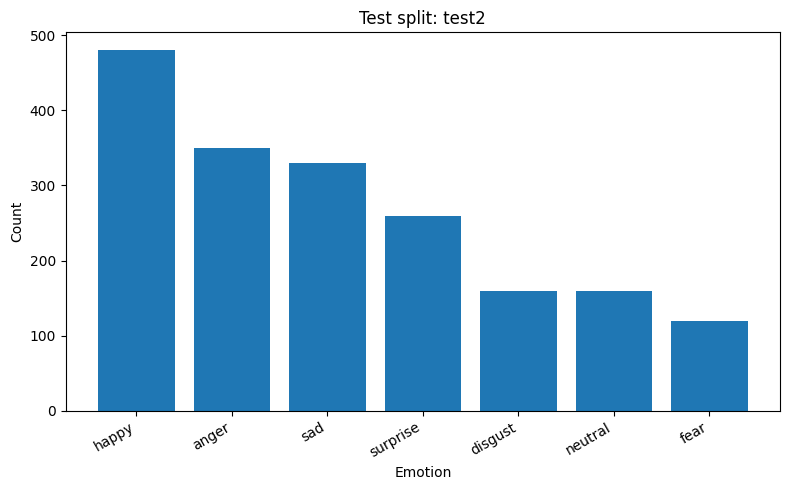

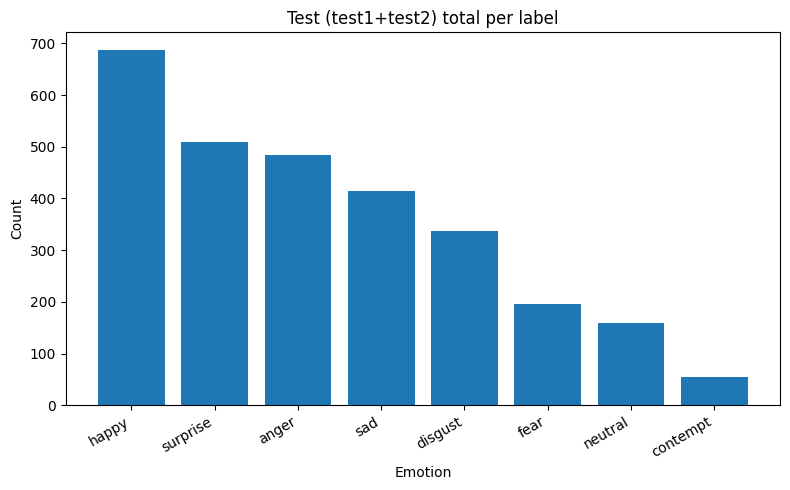

In [5]:
#Stats test1 / test2
test_splits = ["test1", "test2"]
test_counts = {}
for s in test_splits:
    split_dir = os.path.join(TEST_ROOT, s)
    test_counts[s] = count_split(split_dir, s)

df_test = counts_to_dataframe(test_counts, test_splits)
print("=== Test splits (per label) ===")
display(df_test)

for s in test_splits:
    df_s = pd.DataFrame(test_counts[s], index=[0]).T
    df_s.columns = ["count"]
    df_s = df_s.sort_values("count", ascending=False)
    barplot_counts(df_s.assign(total=df_s["count"]), f"Test split: {s}")

barplot_counts(df_test, "Test (test1+test2) total per label")

In [6]:
# Summary for Most and Minority
top_k = 2
tail_k = 2

majority = df_train["total"].nlargest(top_k)
minority = df_train["total"].nsmallest(tail_k)
majority = df_test["total"].nlargest(top_k)
minority = df_test["total"].nsmallest(tail_k)

print("\n>>> Training set - Most classes (Top {}):".format(top_k))
display(majority.to_frame(name="count"))

print(">>> Training set - Minority Classes (Bottom {}):".format(tail_k))
display(minority.to_frame(name="count"))

print("\n>>> Test set - Most classes (Top {}):".format(top_k))
display(majority.to_frame(name="count"))

print(">>> Test set - Minority Classes (Bottom {}):".format(tail_k))
display(minority.to_frame(name="count"))

print("\n The above statistics have incorporated common variants (for example, happiness→happy, surprised→surprise, sadness→sad).。")



>>> Training set - Most classes (Top 2):


,count
happy,687
surprise,509


>>> Training set - Minority Classes (Bottom 2):


,count
contempt,54
neutral,160



>>> Test set - Most classes (Top 2):


,count
happy,687
surprise,509


>>> Test set - Minority Classes (Bottom 2):


,count
contempt,54
neutral,160



 The above statistics have incorporated common variants (for example, happiness→happy, surprised→surprise, sadness→sad).。


part2: micro_expression_classification

In [7]:
# importing required libraries
import os
import torch
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as tt

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from keras.utils import to_categorical
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Attention, GlobalAveragePooling2D, Reshape, MultiHeadAttention
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from keras.models import Model
from sklearn.metrics import classification_report

In [9]:
import os

ROOT = "/content/drive/MyDrive/data"
for split_root, splits in [("train", ["train1","train2","train3"]),
                           ("test",  ["test1","test2"])]:
    base = os.path.join(ROOT, split_root)
    print(f"\n[{split_root}] base exists?", os.path.isdir(base), "->", base)
    for s in splits:
        p = os.path.join(base, s)
        print(" ", s, "exists?", os.path.isdir(p))
        if os.path.isdir(p):
            sub = [d for d in os.listdir(p) if os.path.isdir(os.path.join(p,d)) and not d.startswith(".")]
            print("   classes level-1:", sub[:10], " ... total:", len(sub))


[train] base exists? True -> /content/drive/MyDrive/data/train
  train1 exists? True
   classes level-1: ['disgust', 'anger', 'fear', 'neutral', 'surprised', 'sad', 'happy']  ... total: 7
  train2 exists? True
   classes level-1: ['disgust', 'anger', 'happiness', 'neutral', 'sadness', 'surprise', 'fear']  ... total: 7
  train3 exists? True
   classes level-1: ['disgust', 'anger', 'happiness', 'sadness', 'surprise', 'fear']  ... total: 6

[test] base exists? True -> /content/drive/MyDrive/data/test
  test1 exists? True
   classes level-1: ['disgust', 'anger', 'surprised', 'fear', 'sad', 'contempt', 'happy']  ... total: 7
  test2 exists? True
   classes level-1: ['disgust', 'anger', 'happiness', 'neutral', 'sadness', 'surprise', 'fear']  ... total: 7


In [13]:
# --- 覆盖 collect_samples：递归收集样本 ---
import os
from collections import Counter
import numpy as np
import torch
from torch.utils.data import WeightedRandomSampler

IMG_EXTS = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}
def is_img(p): return os.path.splitext(p)[1].lower() in IMG_EXTS

def collect_samples(root, splits):

    # 汇总全部类名
    cls_set = set()
    for s in splits:
        split_dir = os.path.join(root, s)
        if not os.path.isdir(split_dir):
            continue
        for c in os.listdir(split_dir):
            if c.startswith("."):
                continue
            class_dir = os.path.join(split_dir, c)
            if os.path.isdir(class_dir):
                cls_set.add(c.strip())
    classes = sorted(list(cls_set))
    class_to_idx = {c:i for i,c in enumerate(classes)}

    # 递归收集
    samples = []
    for s in splits:
        split_dir = os.path.join(root, s)
        if not os.path.isdir(split_dir):
            continue
        for c in os.listdir(split_dir):
            if c.startswith("."):
                continue
            class_dir = os.path.join(split_dir, c)
            if not os.path.isdir(class_dir):
                continue
            if c not in class_to_idx:
                continue
            idx = class_to_idx[c]
            for r, _, files in os.walk(class_dir):
                for f in files:
                    if is_img(f):
                        samples.append((os.path.join(r, f), idx))
    return samples, classes, class_to_idx

# 重新收集样本
DATA_ROOT   = "/content/drive/MyDrive/data"
TRAIN_ROOT  = os.path.join(DATA_ROOT, "train")
TRAIN_SPLITS = ["train1", "train2", "train3"]

train_samples, classes, class_to_idx = collect_samples(TRAIN_ROOT, TRAIN_SPLITS)
print("Classes:", classes)
print("Train size:", len(train_samples))

# 防御性检查：若仍为0，打印目录诊断并回退
if len(train_samples) == 0:
    print("[ERROR] 没找到任何训练图片，请检查：")
    for s in TRAIN_SPLITS:
        p = os.path.join(TRAIN_ROOT, s)
        print(" -", p, "存在吗？", os.path.isdir(p))
        if os.path.isdir(p):
            print("   子项：", [d for d in os.listdir(p) if not d.startswith(".")])
    raise SystemExit

# 统计每类样本数（用于权重/少数类识别）
from collections import Counter
train_counts = Counter([y for _, y in train_samples])
print("Per-class counts:", {classes[i]: c for i, c in train_counts.items()})

# === WeightedRandomSampler 安全构建 ===
class_sample_count = np.array([train_counts.get(i, 0) for i in range(len(classes))], dtype=np.float64)
# 防止除零
class_sample_count[class_sample_count == 0] = 1.0
class_weights = 1.0 / class_sample_count
sample_weights = np.array([class_weights[y] for _, y in train_samples], dtype=np.float64)

# 如果 sample_weights 为空，回退为普通 shuffle（理论上不会，因为上面已拦截）
if sample_weights.size == 0:
    print("[WARN] sample_weights 为空，使用 shuffle=True 回退。")
    sampler = None
else:
    sampler = WeightedRandomSampler(
        weights=torch.from_numpy(sample_weights).double(),
        num_samples=int(sample_weights.size),
        replacement=True
    )

# 之后的 DataLoader：
# train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, sampler=sampler if sampler else None, shuffle=(sampler is None))


Classes: ['anger', 'disgust', 'fear', 'happiness', 'happy', 'neutral', 'sad', 'sadness', 'surprise', 'surprised']
Train size: 45379
Per-class counts: {'disgust': 2598, 'anger': 6928, 'fear': 6076, 'neutral': 5609, 'surprised': 3171, 'sad': 4830, 'happy': 7215, 'happiness': 3450, 'sadness': 2883, 'surprise': 2619}


Using device: cuda | FAST_MODE = True | KEEP_SAD = True
Found train images: 45379 | test images: 2841
Canonical classes: ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Per-class train counts: {'anger': 6928, 'disgust': 2598, 'fear': 6076, 'happy': 10665, 'neutral': 5609, 'sad': 7713, 'surprise': 5790}
[WARN] MobileNetV2 预训练权重加载失败，使用随机初始化： 'mean'
>> 抽取/加载训练特征 ...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


>> 抽取/加载测试特征 ...
Embeddings: (45379, 1280) (2787, 1280) | #classes: 7
Feature dim used: 128

== Baseline (no SMOTE) [FAST] ==
Acc: 0.1209 Macro-F1: 0.0308 Weighted-F1: 0.0261

Classification report:
               precision    recall  f1-score   support

       anger     0.0000    0.0000    0.0000       485
     disgust     0.1209    1.0000    0.2157       337
        fear     0.0000    0.0000    0.0000       195
       happy     0.0000    0.0000    0.0000       687
     neutral     0.0000    0.0000    0.0000       160
         sad     0.0000    0.0000    0.0000       414
    surprise     0.0000    0.0000    0.0000       509

    accuracy                         0.1209      2787
   macro avg     0.0173    0.1429    0.0308      2787
weighted avg     0.0146    0.1209    0.0261      2787



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


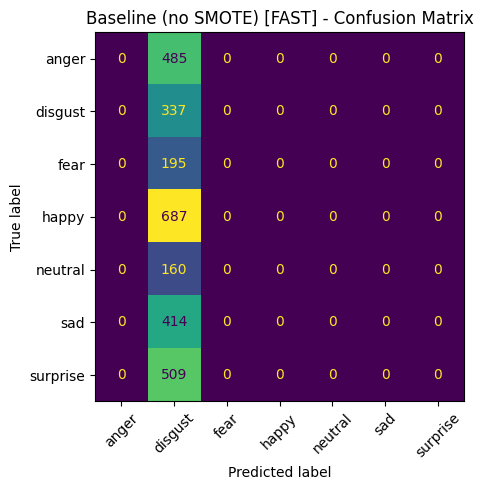

SMOTE target per minority (median): 6076
After SMOTE: (49610, 128) {np.int64(1): 6076, np.int64(0): 6928, np.int64(2): 6076, np.int64(4): 6076, np.int64(6): 6076, np.int64(5): 7713, np.int64(3): 10665}

== SMOTE (k=3) + SGD[FAST] ==
Acc: 0.1209 Macro-F1: 0.0308 Weighted-F1: 0.0261

Classification report:
               precision    recall  f1-score   support

       anger     0.0000    0.0000    0.0000       485
     disgust     0.1209    1.0000    0.2157       337
        fear     0.0000    0.0000    0.0000       195
       happy     0.0000    0.0000    0.0000       687
     neutral     0.0000    0.0000    0.0000       160
         sad     0.0000    0.0000    0.0000       414
    surprise     0.0000    0.0000    0.0000       509

    accuracy                         0.1209      2787
   macro avg     0.0173    0.1429    0.0308      2787
weighted avg     0.0146    0.1209    0.0261      2787



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


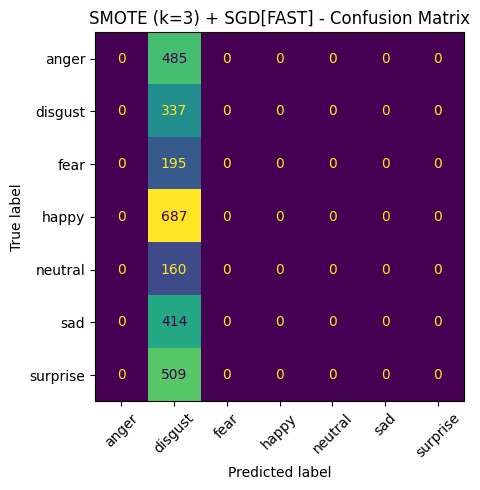


=== Summary ===
                    Method      Acc  MacroF1  WeightedF1
Baseline (no SMOTE) [FAST] 0.120919 0.030821    0.026088
   SMOTE (k=3) + SGD[FAST] 0.120919 0.030821    0.026088


In [17]:
# =========================
# 方法 B：特征空间 SMOTE（独立脚本）
# =========================
import os, numpy as np, torch
from pathlib import Path
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as T
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# ----------- 配置 -----------
DATA_ROOT = "/content/drive/MyDrive/data"  # <- 按需修改
FAST_MODE = True          # True=更快（MobileNetV2+PCA+SGD）；False=更“标准”（ResNet18+PCA+LogReg）
KEEP_SAD  = True          # True=7类(含sad)；False=严格6类
CACHE_DIR = "/content"    # 特征缓存目录
BATCH_FAST, BATCH_STD = 256, 128

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device, "| FAST_MODE =", FAST_MODE, "| KEEP_SAD =", KEEP_SAD)

# ----------- 扫描 train/test 图像路径 -----------
IMG_EXTS = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}
def _is_img(p: Path): return p.suffix.lower() in IMG_EXTS

def _discover_splits(base: Path, prefix: str):
    """返回 base 下名字以 prefix 开头的子目录（train1/2/3 或 test1/2）。
       兜底：若 base 本身直接是类目录集合，也将 base 视为一个 split。"""
    if not base.exists(): return []
    subs = [d for d in base.iterdir() if d.is_dir() and not d.name.startswith(".")]
    splits = [d for d in subs if d.name.lower().startswith(prefix)]
    if len(splits) == 0 and any(ch.is_dir() for ch in subs):
        splits = [base]  # 平铺结构：data/train/Anger/...
    return splits

def _scan_samples(root_dir: Path, split_prefix: str):
    """递归扫描 root_dir 下的所有 split（train*/test*），返回 [(path, class_name_lower)]。"""
    samples = []
    splits = _discover_splits(root_dir, split_prefix)
    for split_dir in splits:
        for class_dir in split_dir.iterdir():
            if not class_dir.is_dir() or class_dir.name.startswith("."):
                continue
            cls = class_dir.name.strip().lower()
            for p in class_dir.rglob("*"):
                if p.is_file() and _is_img(p):
                    samples.append((str(p), cls))
    return samples

train_base = Path(DATA_ROOT) / "train"
test_base  = Path(DATA_ROOT) / "test"
assert train_base.exists() and test_base.exists(), f"未找到 {train_base} 或 {test_base}，请检查 DATA_ROOT"

raw_train = _scan_samples(train_base, "train")
raw_test  = _scan_samples(test_base,  "test")
print(f"Found train images: {len(raw_train)} | test images: {len(raw_test)}")

# ----------- 同义标签合并 & 选择 6/7 类 -----------
CANON_MAP = {
    "happiness": "happy",
    "surprised": "surprise",
    "sadness": "sad",
    "angry": "anger",
    "disgusted": "disgust",
}
def canonicalize(name: str) -> str:
    n = name.strip().lower()
    return CANON_MAP.get(n, n)

ALLOWED6 = {"anger","disgust","fear","happy","neutral","surprise"}
ALLOWED7 = ALLOWED6 | {"sad"}
ALLOW_SET = ALLOWED7 if KEEP_SAD else ALLOWED6

def canonical_filter(samples):
    out = []
    for p, cls in samples:
        c = canonicalize(cls)
        if c in ALLOW_SET:
            out.append((p, c))
    return out

train_name_samples = canonical_filter(raw_train)
test_name_samples  = canonical_filter(raw_test)
assert len(train_name_samples)>0 and len(test_name_samples)>0, "过滤后没有样本，请检查标签或 ALLOW_SET"

classes_c = sorted(set(n for _, n in train_name_samples) | set(n for _, n in test_name_samples))
name2idx = {n:i for i,n in enumerate(classes_c)}
train_samples = [(p, name2idx[n]) for p, n in train_name_samples]
test_samples  = [(p, name2idx[n]) for p, n in test_name_samples]
print("Canonical classes:", classes_c)

cnt_train = Counter([y for _, y in train_samples])
print("Per-class train counts:", {classes_c[i]: cnt_train.get(i,0) for i in range(len(classes_c))})

# ----------- 特征提取（MobileNetV2/ResNet18，可缓存） -----------
if FAST_MODE:
    from torchvision.models import MobileNet_V2_Weights
    try:
        weights = MobileNet_V2_Weights.IMAGENET1K_V1
        mean, std = weights.meta["mean"], weights.meta["std"]
        backbone = models.mobilenet_v2(weights=weights).to(device)
    except Exception as e:
        print("[WARN] MobileNetV2 预训练权重加载失败，使用随机初始化：", e)
        backbone = models.mobilenet_v2(weights=None).to(device)
        mean, std = [0.485,0.456,0.406], [0.229,0.224,0.225]
    backbone.eval()
    feature_extractor = torch.nn.Sequential(backbone.features, torch.nn.AdaptiveAvgPool2d(1)).to(device)  # -> [B,1280,1,1]
    FEAT_DIM = 1280
    BATCH = BATCH_FAST
    PCA_DIM = 128
    SMOTE_K = 3
else:
    from torchvision.models import ResNet18_Weights
    try:
        weights = ResNet18_Weights.DEFAULT
        mean, std = weights.meta["mean"], weights.meta["std"]
        backbone = models.resnet18(weights=weights).to(device)
    except Exception as e:
        print("[WARN] ResNet18 预训练权重加载失败，使用随机初始化：", e)
        backbone = models.resnet18(weights=None).to(device)
        mean, std = [0.485,0.456,0.406], [0.229,0.224,0.225]
    backbone.eval()
    feature_extractor = torch.nn.Sequential(*list(backbone.children())[:-1]).to(device)  # -> [B,512,1,1]
    FEAT_DIM = 512
    BATCH = BATCH_STD
    PCA_DIM = 256
    SMOTE_K = 5

feat_tf = T.Compose([
    T.Resize((128,128)),
    T.Grayscale(num_output_channels=3),
    T.ToTensor(),
    T.Normalize(mean=mean, std=std),
])

class FeatDataset(Dataset):
    def __init__(self, samples_idx, tf):
        self.samples = samples_idx
        self.tf = tf
    def __len__(self): return len(self.samples)
    def __getitem__(self, i):
        p, y = self.samples[i]
        img = Image.open(p).convert("RGB")
        return self.tf(img), y

pin = (device == "cuda")
loader_tr = DataLoader(FeatDataset(train_samples, feat_tf), batch_size=BATCH, shuffle=False,
                       num_workers=4, pin_memory=pin, persistent_workers=True)
loader_te = DataLoader(FeatDataset(test_samples,  feat_tf), batch_size=BATCH, shuffle=False,
                       num_workers=4, pin_memory=pin, persistent_workers=True)

# 缓存键
cache_tag = f"{'mbv2' if FAST_MODE else 'resnet18'}_{'7cls' if KEEP_SAD else '6cls'}_{len(train_samples)}tr_{len(test_samples)}te"
train_cache = os.path.join(CACHE_DIR, f"emb_train_{cache_tag}.npz")
test_cache  = os.path.join(CACHE_DIR, f"emb_test_{cache_tag}.npz")

@torch.no_grad()
def extract_embeddings(loader):
    embs, ys = [], []
    for x, y in loader:
        x = x.to(device)
        f = feature_extractor(x).squeeze(-1).squeeze(-1)  # -> [B, FEAT_DIM]
        embs.append(f.cpu().numpy()); ys.append(np.asarray(y))
    X = np.concatenate(embs, axis=0); Y = np.concatenate(ys, axis=0)
    return X, Y

def get_embeddings(loader, cache_path):
    if os.path.exists(cache_path):
        data = np.load(cache_path)
        return data["X"], data["y"]
    X, y = extract_embeddings(loader)
    np.savez_compressed(cache_path, X=X, y=y)
    return X, y

print(">> 抽取/加载训练特征 ...")
X_tr, y_tr = get_embeddings(loader_tr, train_cache)
print(">> 抽取/加载测试特征 ...")
X_te, y_te = get_embeddings(loader_te, test_cache)
print("Embeddings:", X_tr.shape, X_te.shape, "| #classes:", len(classes_c))

# ----------- （可选）PCA 降维 -----------
USE_PCA = True
if USE_PCA and PCA_DIM is not None:
    pca = PCA(n_components=PCA_DIM, random_state=42)
    X_tr_p = pca.fit_transform(X_tr)
    X_te_p = pca.transform(X_te)
    FEAT_USED = PCA_DIM
else:
    X_tr_p, X_te_p = X_tr, X_te
    FEAT_USED = X_tr.shape[1]
print("Feature dim used:", FEAT_USED)

# ----------- 训练与评估工具 -----------
def train_and_eval(Xtr, ytr, Xte, yte, title, fast_mode=True):
    if fast_mode:
        clf = SGDClassifier(loss="log_loss", max_iter=30, tol=1e-3,
                            class_weight="balanced", n_jobs=-1, random_state=42)
    else:
        clf = LogisticRegression(max_iter=2000, tol=1e-4,
                                 class_weight="balanced", solver="saga",
                                 multi_class="multinomial", n_jobs=-1, random_state=42)
    clf.fit(Xtr, ytr)
    yp = clf.predict(Xte)
    acc = accuracy_score(yte, yp)
    f1m = f1_score(yte, yp, average="macro")
    f1w = f1_score(yte, yp, average="weighted")
    print(f"\n== {title} ==")
    print("Acc:", f"{acc:.4f}", "Macro-F1:", f"{f1m:.4f}", "Weighted-F1:", f"{f1w:.4f}")
    print("\nClassification report:\n",
          classification_report(yte, yp, target_names=classes_c, digits=4))
    disp = ConfusionMatrixDisplay(confusion_matrix(yte, yp, labels=list(range(len(classes_c)))),
                                  display_labels=classes_c)
    fig, ax = plt.subplots(figsize=(6,5))
    disp.plot(ax=ax, xticks_rotation=45, colorbar=False)
    plt.title(title + " - Confusion Matrix"); plt.tight_layout(); plt.show()
    return {"Method": title, "Acc": acc, "MacroF1": f1m, "WeightedF1": f1w}

# ----------- Baseline（无 SMOTE）-----------
results = []
results.append(train_and_eval(X_tr_p, y_tr, X_te_p, y_te,
                              "Baseline (no SMOTE) " + ("[FAST]" if FAST_MODE else "[STD]"),
                              fast_mode=FAST_MODE))

# ----------- SMOTE（特征空间）-----------
counts = np.bincount(y_tr.astype(int))
if FAST_MODE:
    # 把每个少数类拉到“中位数”规模（更快，内存压力小）
    target = int(np.median(counts[counts>0]))
    sampling_dict = {cls: target for cls, cnt in enumerate(counts) if cnt>0 and cnt < target}
    print("SMOTE target per minority (median):", target)
    smote = SMOTE(random_state=42, sampling_strategy=sampling_dict, k_neighbors=3)
else:
    # 经典设置：非多数类上采到多数类规模
    smote = SMOTE(random_state=42, sampling_strategy="not_majority", k_neighbors=5)

X_tr_sm, y_tr_sm = smote.fit_resample(X_tr_p, y_tr)
print("After SMOTE:", X_tr_sm.shape, dict(Counter(y_tr_sm)))

results.append(train_and_eval(X_tr_sm, y_tr_sm, X_te_p, y_te,
                              f"SMOTE (k={'3' if FAST_MODE else '5'}) + " + ("SGD[FAST]" if FAST_MODE else "LogReg[STD]"),
                              fast_mode=FAST_MODE))

# ----------- 结果汇总表 -----------
summary = pd.DataFrame(results)[["Method","Acc","MacroF1","WeightedF1"]]
print("\n=== Summary ===")
print(summary.to_string(index=False))


In [20]:
import glob, os
for f in glob.glob('/content/emb_train_*.npz') + glob.glob('/content/emb_test_*.npz'):
    print("remove", f)
    os.remove(f)

remove /content/emb_train_mbv2_7cls_45379tr_2787te.npz
remove /content/emb_test_mbv2_7cls_45379tr_2787te.npz


In [21]:
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# —— 选 MobileNetV2（快）——
from torchvision.models import MobileNet_V2_Weights
weights = MobileNet_V2_Weights.DEFAULT  # 或 IMAGENET1K_V1，二者都行
backbone = models.mobilenet_v2(weights=weights).to(device)
backbone.eval()
feature_extractor = torch.nn.Sequential(
    backbone.features, torch.nn.AdaptiveAvgPool2d(1)
).to(device)  # -> [B,1280,1,1]

# 用官方 transforms（含Resize到权重推荐尺寸、ToTensor、Normalize）
preprocess = weights.transforms()
feat_tf = T.Compose([
    T.Grayscale(num_output_channels=3),  # 先转RGB三通道
    preprocess                           # 再用权重自带预处理（含Resize）
])
FEAT_DIM = 1280


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 138MB/s]


In [22]:
from torchvision.models import ResNet18_Weights
weights = ResNet18_Weights.DEFAULT
backbone = models.resnet18(weights=weights).to(device)
backbone.eval()
feature_extractor = torch.nn.Sequential(*list(backbone.children())[:-1]).to(device)  # -> [B,512,1,1]
preprocess = weights.transforms()
feat_tf = T.Compose([T.Grayscale(num_output_channels=3), preprocess])
FEAT_DIM = 512


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


In [25]:
num_workers = 2
pin = (device == "cuda")
loader_tr = DataLoader(FeatDataset(train_samples, feat_tf), batch_size=256, shuffle=False,
                       num_workers=num_workers, pin_memory=pin)
loader_te = DataLoader(FeatDataset(test_samples,  feat_tf), batch_size=256, shuffle=False,
                       num_workers=num_workers, pin_memory=pin)

Using device: cuda | KEEP_SAD = True
Found train images: 45379 | test images: 2841
Canonical classes: ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Per-class train counts: {'anger': 6928, 'disgust': 2598, 'fear': 6076, 'happy': 10665, 'neutral': 5609, 'sad': 7713, 'surprise': 5790}
>> 抽取训练特征 ...
>> 抽取测试特征 ...
Embeddings: (45379, 512) (2787, 512) | #classes: 7


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



== Baseline (ResNet18 features, no SMOTE) ==
Acc: 0.5192 Macro-F1: 0.4524 Weighted-F1: 0.5278

Classification report:
               precision    recall  f1-score   support

       anger     0.4600    0.3918    0.4232       485
     disgust     0.2995    0.3412    0.3190       337
        fear     0.3241    0.1795    0.2310       195
       happy     0.7772    0.6754    0.7227       687
     neutral     0.1779    0.5125    0.2641       160
         sad     0.5311    0.3502    0.4221       414
    surprise     0.7550    0.8173    0.7849       509

    accuracy                         0.5192      2787
   macro avg     0.4750    0.4668    0.4524      2787
weighted avg     0.5575    0.5192    0.5278      2787

Pred distribution: {'anger': 413, 'disgust': 384, 'fear': 108, 'happy': 597, 'neutral': 461, 'sad': 273, 'surprise': 551}


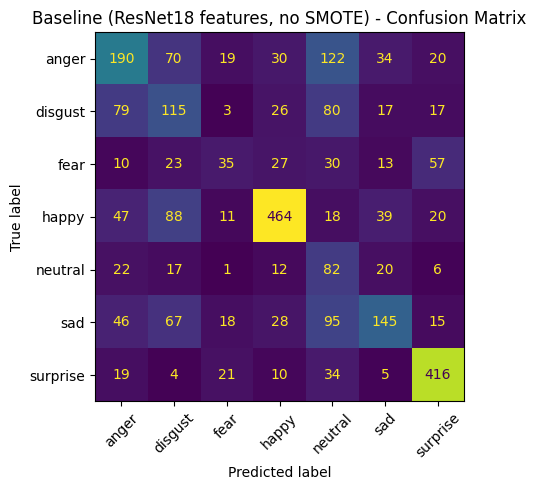

Feature dim after PCA: 128
SMOTE target per minority (median): 6076
After SMOTE: (49610, 128) {np.int64(1): 6076, np.int64(0): 6928, np.int64(2): 6076, np.int64(4): 6076, np.int64(6): 6076, np.int64(5): 7713, np.int64(3): 10665}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



== PCA(128) + SMOTE(median) ==
Acc: 0.4607 Macro-F1: 0.3883 Weighted-F1: 0.4669

Classification report:
               precision    recall  f1-score   support

       anger     0.3540    0.2948    0.3217       485
     disgust     0.2531    0.3056    0.2769       337
        fear     0.2609    0.0923    0.1364       195
       happy     0.6817    0.6172    0.6478       687
     neutral     0.1218    0.3563    0.1815       160
         sad     0.4887    0.3140    0.3824       414
    surprise     0.7423    0.8035    0.7717       509

    accuracy                         0.4607      2787
   macro avg     0.4146    0.3977    0.3883      2787
weighted avg     0.4936    0.4607    0.4669      2787

Pred distribution: {'anger': 404, 'disgust': 407, 'fear': 69, 'happy': 622, 'neutral': 468, 'sad': 266, 'surprise': 551}


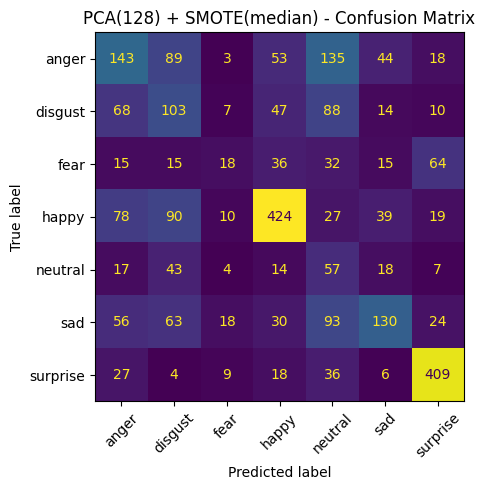


=== Summary ===
                                Method      Acc  MacroF1  WeightedF1
Baseline (ResNet18 features, no SMOTE) 0.519196 0.452436    0.527751
              PCA(128) + SMOTE(median) 0.460710 0.388337    0.466852


In [26]:
# =========================
# 重新抽特征 → Baseline → PCA+SMOTE
# =========================
import os, glob, numpy as np, torch
from pathlib import Path
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt

# sklearn / imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# torch / tv
import torchvision.transforms as T
import torchvision.models as models
from torchvision.models import ResNet18_Weights
from torch.utils.data import Dataset, DataLoader

# ---------- 配置 ----------
DATA_ROOT = "/content/drive/MyDrive/data"  # ← 按需修改你的数据根目录
KEEP_SAD  = True        # True=7类(含sad)；False=严格6类
CACHE_DIR = "/content"  # 特征缓存目录（这次会先清理旧缓存）
BATCH     = 256
NUM_WORKERS = 2
RANDOM_STATE = 42

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device, "| KEEP_SAD =", KEEP_SAD)

# ---------- 0) 清理旧缓存（避免用到“随机初始化”抽的坏特征） ----------
for f in glob.glob(os.path.join(CACHE_DIR, "emb_train_*.npz")) + glob.glob(os.path.join(CACHE_DIR, "emb_test_*.npz")):
    try:
        os.remove(f)
        print("Removed cache:", f)
    except Exception as e:
        print("Skip remove:", f, e)

# ---------- 1) 扫描 train/test 样本 ----------
IMG_EXTS = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}
def _is_img(p: Path): return p.suffix.lower() in IMG_EXTS

def _discover_splits(base: Path, prefix: str):
    if not base.exists(): return []
    subs = [d for d in base.iterdir() if d.is_dir() and not d.name.startswith(".")]
    splits = [d for d in subs if d.name.lower().startswith(prefix)]
    if len(splits) == 0 and any(ch.is_dir() for ch in subs):
        splits = [base]  # 平铺结构：data/train/Anger/...
    return splits

def _scan_samples(root_dir: Path, split_prefix: str):
    samples = []
    for split_dir in _discover_splits(root_dir, split_prefix):
        for class_dir in split_dir.iterdir():
            if not class_dir.is_dir() or class_dir.name.startswith("."):
                continue
            cls = class_dir.name.strip().lower()
            for p in class_dir.rglob("*"):
                if p.is_file() and _is_img(p):
                    samples.append((str(p), cls))
    return samples

train_base = Path(DATA_ROOT) / "train"
test_base  = Path(DATA_ROOT) / "test"
assert train_base.exists() and test_base.exists(), f"未找到 {train_base} 或 {test_base}，请检查 DATA_ROOT"

raw_train = _scan_samples(train_base, "train")
raw_test  = _scan_samples(test_base,  "test")
print(f"Found train images: {len(raw_train)} | test images: {len(raw_test)}")

# ---------- 2) 同义标签合并 + 选择 6/7 类 ----------
CANON_MAP = {
    "happiness": "happy",
    "surprised": "surprise",
    "sadness": "sad",
    "angry": "anger",
    "disgusted": "disgust",
}
def canonicalize(name: str) -> str:
    n = name.strip().lower()
    return CANON_MAP.get(n, n)

ALLOWED6 = {"anger","disgust","fear","happy","neutral","surprise"}
ALLOWED7 = ALLOWED6 | {"sad"}
ALLOW_SET = ALLOWED7 if KEEP_SAD else ALLOWED6

def canonical_filter(samples):
    out = []
    for p, cls in samples:
        c = canonicalize(cls)
        if c in ALLOW_SET:
            out.append((p, c))
    return out

train_name_samples = canonical_filter(raw_train)
test_name_samples  = canonical_filter(raw_test)
assert len(train_name_samples)>0 and len(test_name_samples)>0, "过滤后没有样本，请检查标签或 ALLOW_SET"

classes_c = sorted(set(n for _, n in train_name_samples) | set(n for _, n in test_name_samples))
name2idx = {n:i for i,n in enumerate(classes_c)}
train_samples = [(p, name2idx[n]) for p, n in train_name_samples]
test_samples  = [(p, name2idx[n]) for p, n in test_name_samples]

print("Canonical classes:", classes_c)
cnt_train = Counter([y for _, y in train_samples])
print("Per-class train counts:", {classes_c[i]: cnt_train.get(i,0) for i in range(len(classes_c))})

# ---------- 3) 预训练 ResNet18 + 官方 transforms ----------
try:
    weights = ResNet18_Weights.DEFAULT  # 官方推荐权重
    preprocess = weights.transforms()   # 自带 Resize / ToTensor / Normalize
    backbone = models.resnet18(weights=weights).to(device)
    backbone.eval()
except Exception as e:
    raise RuntimeError(f"❌ 预训练权重加载失败：{e}\n请先在 Colab 执行：!pip install --upgrade torch torchvision && 重新运行") from e

# 灰度→3通道，然后套用官方 transforms
feat_tf = T.Compose([
    T.Grayscale(num_output_channels=3),
    preprocess
])

feature_extractor = torch.nn.Sequential(*list(backbone.children())[:-1]).to(device)  # -> [B,512,1,1]
FEAT_DIM = 512

class FeatDataset(Dataset):
    def __init__(self, samples_idx, tf): self.samples, self.tf = samples_idx, tf
    def __len__(self): return len(self.samples)
    def __getitem__(self, i):
        p, y = self.samples[i]
        img = Image.open(p).convert("RGB")
        return self.tf(img), y

pin = (device == "cuda")
loader_tr = DataLoader(FeatDataset(train_samples, feat_tf), batch_size=BATCH, shuffle=False,
                       num_workers=NUM_WORKERS, pin_memory=pin)
loader_te = DataLoader(FeatDataset(test_samples,  feat_tf), batch_size=BATCH, shuffle=False,
                       num_workers=NUM_WORKERS, pin_memory=pin)

@torch.no_grad()
def extract_embeddings(loader):
    embs, ys = [], []
    for x, y in loader:
        x = x.to(device)
        f = feature_extractor(x).squeeze(-1).squeeze(-1)  # -> [B, FEAT_DIM]
        embs.append(f.cpu().numpy()); ys.append(np.asarray(y))
    X = np.concatenate(embs, axis=0); Y = np.concatenate(ys, axis=0)
    return X, Y

print(">> 抽取训练特征 ...")
X_tr, y_tr = extract_embeddings(loader_tr)
print(">> 抽取测试特征 ...")
X_te, y_te = extract_embeddings(loader_te)
print("Embeddings:", X_tr.shape, X_te.shape, "| #classes:", len(classes_c))

# ---------- 4) Baseline（无 SMOTE） ----------
def eval_and_plot(Xtr, ytr, Xte, yte, title):
    clf = LogisticRegression(max_iter=2000, tol=1e-4,
                             class_weight="balanced", solver="saga",
                             multi_class="multinomial", n_jobs=-1,
                             random_state=RANDOM_STATE)
    clf.fit(Xtr, ytr)
    yp = clf.predict(Xte)
    acc = accuracy_score(yte, yp)
    f1m = f1_score(yte, yp, average="macro")
    f1w = f1_score(yte, yp, average="weighted")
    print(f"\n== {title} ==")
    print("Acc:", f"{acc:.4f}", "Macro-F1:", f"{f1m:.4f}", "Weighted-F1:", f"{f1w:.4f}")
    print("\nClassification report:\n",
          classification_report(yte, yp, target_names=classes_c, digits=4, zero_division=0))
    # 预测分布 sanity-check
    uniq, cnt = np.unique(yp, return_counts=True)
    print("Pred distribution:", {classes_c[i]: int(c) for i, c in zip(uniq, cnt)})
    # 混淆矩阵
    disp = ConfusionMatrixDisplay(confusion_matrix(yte, yp, labels=list(range(len(classes_c)))),
                                  display_labels=classes_c)
    fig, ax = plt.subplots(figsize=(6,5))
    disp.plot(ax=ax, xticks_rotation=45, colorbar=False)
    plt.title(title + " - Confusion Matrix"); plt.tight_layout(); plt.show()
    return {"Method": title, "Acc": acc, "MacroF1": f1m, "WeightedF1": f1w}

results = []
results.append(eval_and_plot(X_tr, y_tr, X_te, y_te, "Baseline (ResNet18 features, no SMOTE)"))

# ---------- 5) PCA(128) + SMOTE（中位数目标） ----------
PCA_DIM = 128
pca = PCA(n_components=PCA_DIM, random_state=RANDOM_STATE)
X_tr_p = pca.fit_transform(X_tr)
X_te_p = pca.transform(X_te)
print("Feature dim after PCA:", X_tr_p.shape[1])

# 以“中位数”为目标：仅对低于中位数的类过采样至中位数
counts = np.bincount(y_tr.astype(int))
target = int(np.median(counts[counts > 0]))
sampling_dict = {cls: target for cls, cnt in enumerate(counts) if cnt > 0 and cnt < target}
print("SMOTE target per minority (median):", target)

smote = SMOTE(random_state=RANDOM_STATE, sampling_strategy=sampling_dict, k_neighbors=3)
X_tr_sm, y_tr_sm = smote.fit_resample(X_tr_p, y_tr)
print("After SMOTE:", X_tr_sm.shape, dict(Counter(y_tr_sm)))

results.append(eval_and_plot(X_tr_sm, y_tr_sm, X_te_p, y_te, "PCA(128) + SMOTE(median)"))

# ---------- 6) 汇总 ----------
import pandas as pd
summary = pd.DataFrame(results)[["Method","Acc","MacroF1","WeightedF1"]]
print("\n=== Summary ===")
print(summary.to_string(index=False))
